<div style="
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 40px 30px 40px 0px;
    border-radius: 15px;
    color: white;
    margin-bottom: 30px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.2);
">

<div style="
    display: grid;
    grid-template-columns: 1fr 3fr 1fr;
    align-items: center;
    max-width: 1000px;
    margin: 0 auto;
">

<!-- Course Info (Left) -->
<div style="text-align: left;">
    <div style="
        background: rgba(255,255,255,0.2);
        padding: 8px 15px;
        border-radius: 20px;
        display: inline-block;
        font-weight: bold;
        margin-bottom: 5px;
    ">IM5022</div>
    <div style="font-size: 0.9em; opacity: 0.9;">Machine Learning</div>
</div>

<!-- Main Title (Center) -->
<div style="text-align: center;">
    <h1 style="
        font-size: 2.2em;
        margin: 0 0 15px 0;
        font-weight: bold;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
    ">Predicting Credit Card Default Using Machine Learning</h1>
    <h2 style="
        font-size: 1.3em;
        margin: 0;
        font-weight: normal;
        font-style: italic;
        opacity: 0.9;
    ">A Comparative Study of Classification Algorithms</h2>
</div>

<!-- Student Info (Right) -->
<div style="text-align: right;">
    <div style="
        background: rgba(255,255,255,0.2);
        padding: 8px 15px;
        border-radius: 20px;
        display: inline-block;
        margin-bottom: 8px;
        font-size: 0.9em;
    ">Student ID: MS25947816</div>
    <br>
    <div style="
        background: rgba(255,255,255,0.2);
        padding: 8px 15px;
        border-radius: 20px;
        display: inline-block;
        font-size: 0.9em;
    ">Student ID: MS25942002</div>
</div>

</div>
</div>

---

## **1 Introduction**



This project specifically focuses on predicting whether a credit card holder will default on their payment in the next month. By analyzing payment history, demographic information, credit utilization patterns, and recent financial behavior, we aim to identify customers at risk of missing their upcoming payment deadline.

Predicting next month defaults is particularly valuable because it provides actionable insights with immediate business impact. Banks can use these predictions to:

  - Send targeted payment reminders
  - Offer payment assistance programs
  - Adjust credit limits proactively
  - Implement early intervention strategies

This notebook demonstrates a comprehensive approach to building, evaluating, and interpreting machine learning models for next month credit card default prediction

## **2 Data Collection & Getting to Know Our Data**
> Here, we are about to check data quality, completeness, and distribution & through EDA we are going to uncover hidden patterns, relationships, and insights that will guide our modeling approach

#### **Dataset Information: Default of Credit Card Clients**

**Overview**
This dataset contains information about credit card clients' default payments in Taiwan. 

**Source:** UCI Machine Learning Repository  
**Dataset ID:** 350  

#### Target Variable - `Y (Default Payment):` Binary variable (1 = Yes, 0 = No)

#### Feature Description

#### Demographics
- `LIMIT_BAL:` Amount of given credit (NT dollar) - includes individual consumer credit and family supplementary credit
- `SEX:` Gender (1 = male, 2 = female)
- `EDUCATION:` Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others)
- `MARRIAGE:` Marital status (1 = married, 2 = single, 3 = others)
- `AGE:` Age in years

#### Payment History (PAY_0-PAY_6)
Past monthly payment records from April to September 2005:
- **PAY_0:** Repayment status in September 2005
- **PAY_2:** Repayment status in August 2005
- **PAY_3:** Repayment status in July 2005
- **PAY_4:** Repayment status in June 2005
- **PAY_5:** Repayment status in May 2005
- **PAY_6:** Repayment status in April 2005

**Payment Status Scale:**
- -1 = Pay duly
- 1 = Payment delay for one month
- 2 = Payment delay for two months
- ...
- 8 = Payment delay for eight months
- 9 = Payment delay for nine months and above

#### Bill Statements (BILL_AMT1-BILL_AMT2)
Amount of bill statement (NT dollar) from April to September 2005:
- **BILL_AMT1:** Bill statement amount in September 2005
- **BILL_AMT2:** Bill statement amount in August 2005
- **BILL_AMT3:** Bill statement amount in July 2005
- **BILL_AMT4:** Bill statement amount in June 2005
- **BILL_AMT5:** Bill statement amount in May 2005
- **BILL_AMT6:** Bill statement amount in April 2005

#### Previous Payments (PAY_AMT1-PAY_AMT6)
Amount of previous payment (NT dollar) from April to September 2005:
- **PAY_AMT1:** Amount paid in September 2005
- **PAY_AMT2:** Amount paid in August 2005
- **PAY_AMT3:** Amount paid in July 2005
- **PAY_AMT4:** Amount paid in June 2005
- **PAY_AMT5:** Amount paid in May 2005
- **PAY_AMT6:** Amount paid in April 2005

### **2.1 Data Loading and Rudimentary Data Cleansing** 

In [22]:
# Load necessary libraries
import pandas as pd
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier



In [23]:
# Set display options for pandas
pd.options.display.max_columns = 50

In [24]:
import pathlib
filen = pathlib.Path(os.path.dirname(os.getcwd())) / pathlib.Path('data/raw/UCI_Credit_Card.csv')

In [25]:
filen

PosixPath('/Users/senthalan/Documents/MScAI25/IT5022-ML-Project/data/raw/UCI_Credit_Card.csv')

In [26]:
pathlib.Path(filen).exists()

True

**Windows Filepath Settings**

In [27]:
# Define the relative path to the dataset
# No need to change this path if the dataset is in the same directory structure
# rel_path = r'data\raw\UCI_Credit_Card.csv'
# base_dir = os.path.dirname(os.getcwd())
# filename = os.path.join(base_dir, rel_path) # Construct the full path to the dataset

In [28]:
# Load the dataset
df = pd.read_csv(filen)
print(f"Dataset loaded from: {filename}")
print(f"Dataset shape: {df.shape}")


Dataset loaded from: /Users/senthalan/Documents/MScAI25/IT5022-ML-Project/data\raw\UCI_Credit_Card.csv
Dataset shape: (30000, 25)


In [29]:
# Display the first few rows of the dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [31]:
# Display summary statistics of the dataframe
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [32]:
# Check for missing values in the dataframe
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missing_columns # no missing values found

[]

In [33]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [34]:
# Display the distribution of the target variable
target_var = 'default.payment.next.month'
print(f"Distribution of target variable '{target_var}':")
print(df[target_var].value_counts(normalize=True))

Distribution of target variable 'default.payment.next.month':
0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64


In [35]:
# Rename columns for clarity
df = df.rename(columns={'PAY_0':'PAY_1', 'default.payment.next.month':'DEFAULT'})
# Drop the ID column as it is not useful for analysis
df = df.drop(columns=['ID'])

In [36]:

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
# Check the unique values in PAY_1 to PAY_6 columns
for i in range(6):
    print('PAY_' + str(i+1), df['PAY_' + str(i+1)].unique())

PAY_1 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


In [38]:
# fill -2, -1, 0 with 0 for PAY_1, PAY_2, ..., PAY_6
# since -2, -1, 0 means pay duly
for i in range(6):
    col = 'PAY_' + str(i+1)
    filter_ = (df[col] == 0) | (df[col] == -1) | (df[col] == -2)
    df.loc[filter_, col] = 0

In [39]:
# Recheck the unique values in PAY_1 to PAY_6 columns
for i in range(6):
    print('PAY_' + str(i+1), df['PAY_' + str(i+1)].unique())

PAY_1 [2 0 1 3 4 8 7 5 6]
PAY_2 [2 0 3 5 7 4 1 6 8]
PAY_3 [0 2 3 4 6 7 1 5 8]
PAY_4 [0 2 3 4 5 7 6 1 8]
PAY_5 [0 2 3 5 4 7 8 6]
PAY_6 [0 2 3 6 4 7 8 5]


In [40]:
# lets label 0 as Others because 0 is not a valid value for MARRIAGE as per the data description
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})
df['MARRIAGE'].value_counts()  # Check the unique values in MARRIAGE column

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [41]:
# Map numerical values to categorical labels for better interpretability
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Others'})

In [42]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# lets label 0, 5, 6 as Others because 0, 5, 6 are not valid values for EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['EDUCATION'].value_counts()  # Check the unique values in EDUCATION column       

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [43]:
# Map numerical values to categorical labels for better interpretability
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'})
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

In [44]:
# Define age groups and create a new column 'age_group', new column names will be denoted snake case
df['age_group'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

In [45]:
# Define categorical and numeric columns for further analysis
category_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'age_group']
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in category_cols + ["DEFAULT"]]

In [46]:
print("Categorical columns:", category_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'age_group']
Numeric columns: ['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [47]:
# Set target variable
target = 'DEFAULT'

### **2.2 Exploratory Data Analysis (EDA)**

#### Univariate Analysis

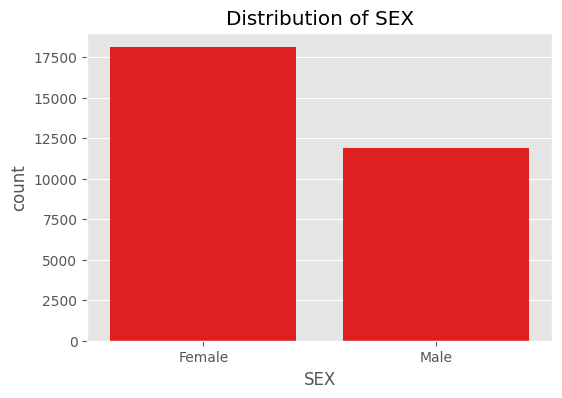

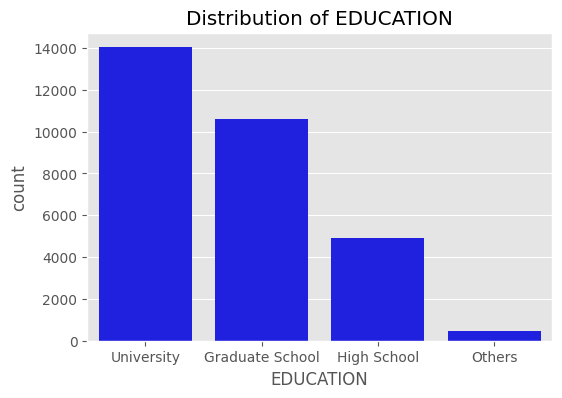

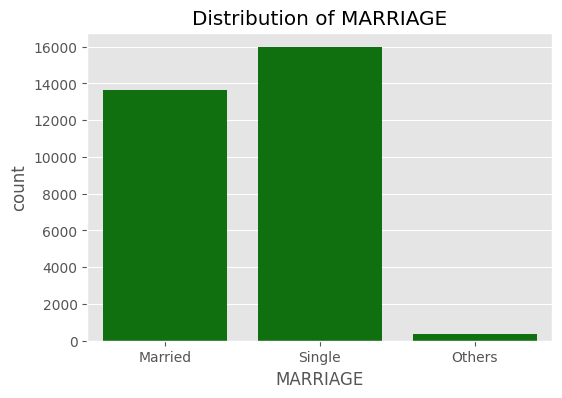

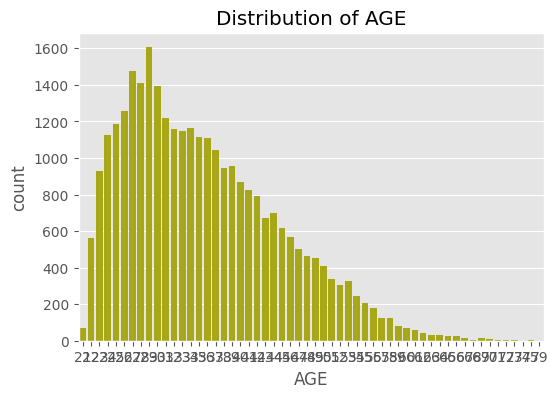

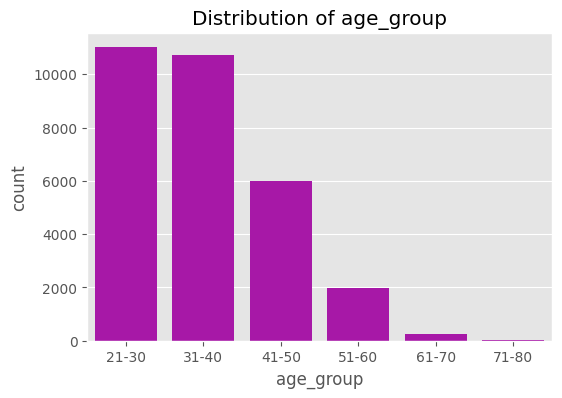

In [48]:
# check sparsity in categorical columns
colors = ['r', 'b', 'g', 'y', 'm', 'c']
for col, c in zip(category_cols, colors):
    plt.style.use('ggplot')
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, color=c)
    plt.title(f'Distribution of {col}')
    plt.show()

In [49]:
# checking about sparse values in numeric columns, checking percentage of zeros
sparse_info = {}    
for col in numeric_cols:
    sparse_info[col] = (df[col] == 0).sum() / df.shape[0] * 100  # percentage of zeros   
sparse_info = dict(sorted(sparse_info.items(), key=lambda item: item[1], reverse=True))
sparse_info 
pd.DataFrame(sparse_info, index=['sparsity %']).T   

,sparsity %
PAY_5,90.106667
PAY_6,89.736667
PAY_4,88.300000
PAY_3,85.956667
PAY_2,85.206667
PAY_1,77.273333
PAY_AMT6,23.910000
PAY_AMT5,22.343333
PAY_AMT4,21.360000
PAY_AMT3,19.893333


In [50]:
df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

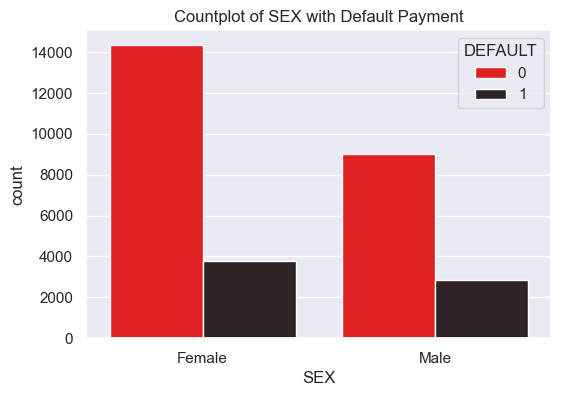

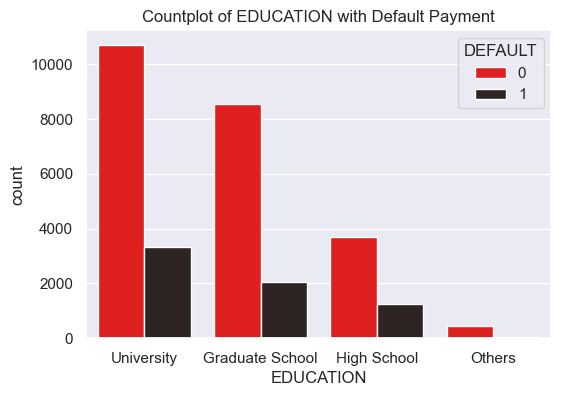

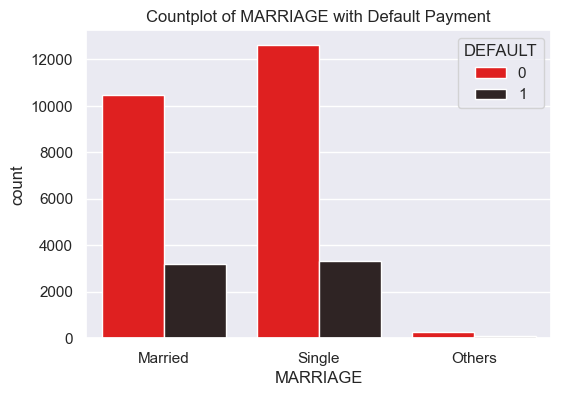

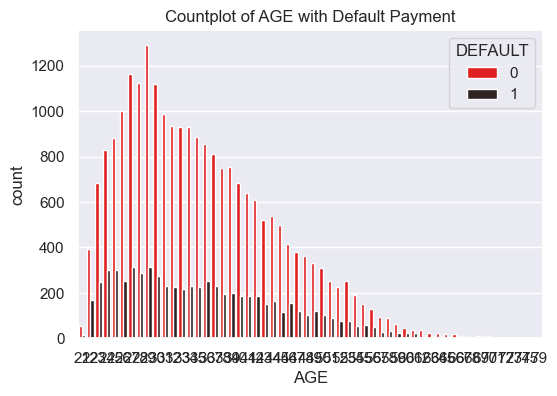

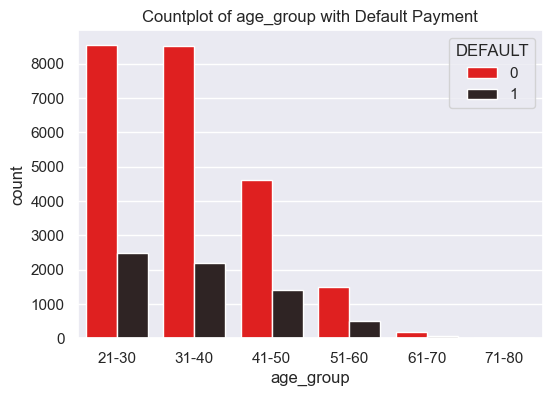

In [51]:
# check relationship between categorical columns and target variable
for col, c in zip(category_cols, colors):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue=target,  palette='dark:red_r')
    plt.title(f'Countplot of {col} with Default Payment')
    plt.show()

In [52]:
# function to draw histograms for numeric columns
def draw_histograms(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.histplot(data=dataframe, x=col, kde=True, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

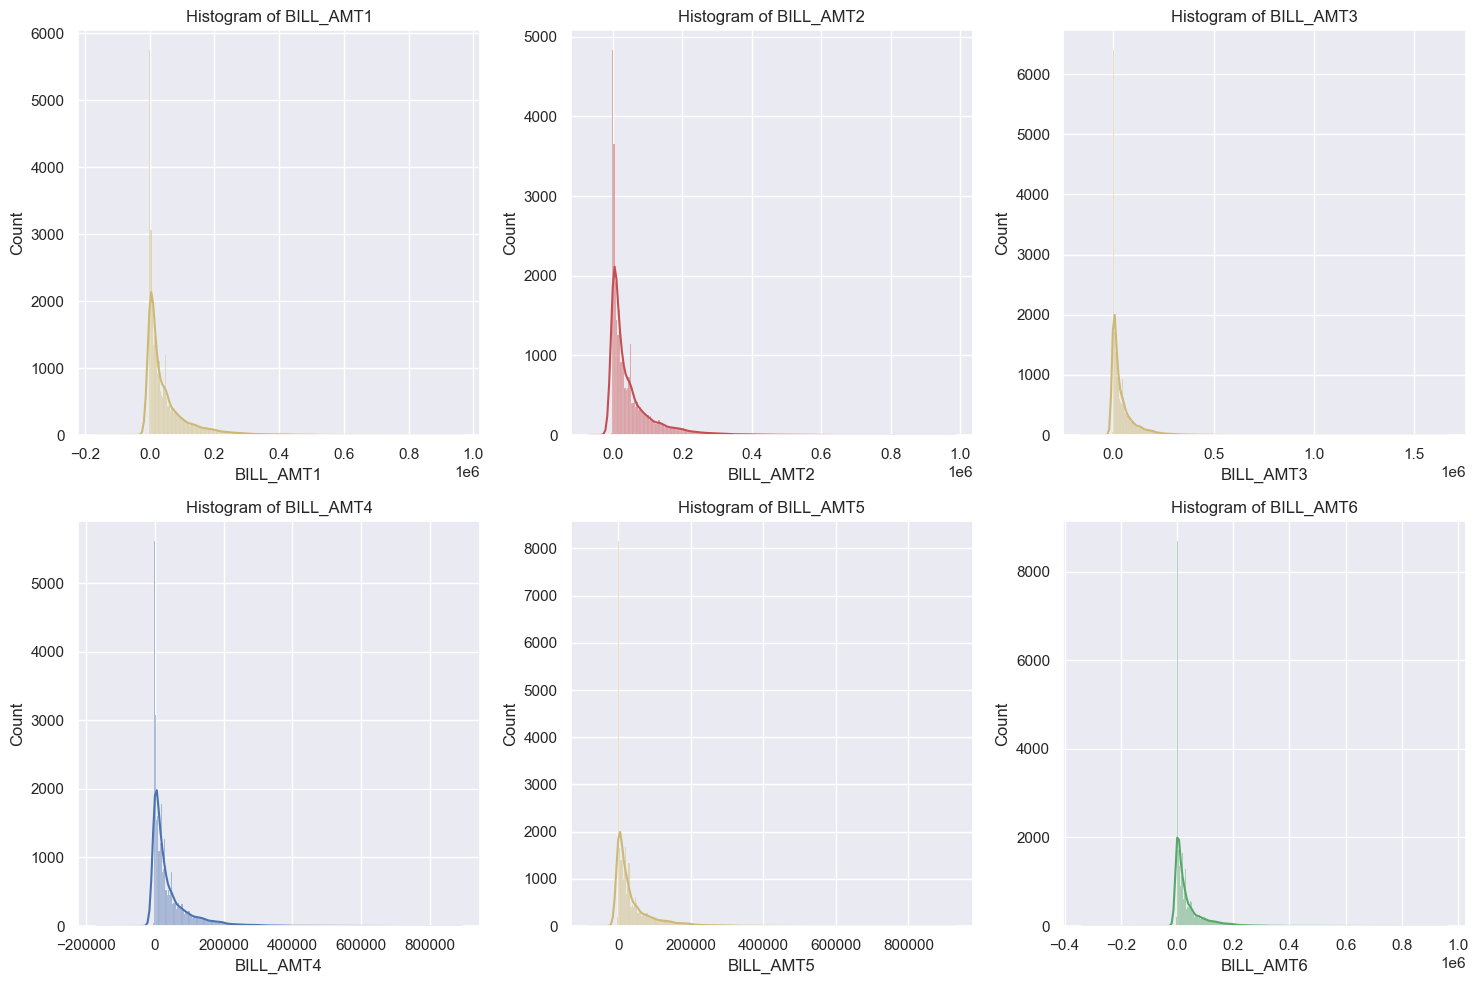

In [53]:
bills = [col for col in numeric_cols if 'BILL_AMT' in col]
draw_histograms(df, bills, 2, 3, figsize=(15, 10))

In [54]:
df[bills].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
90%,142133.700000,136905.500000,1.320513e+05,122418.700000,115883.000000,112110.400000
95%,201203.050000,194792.200000,1.878210e+05,174333.350000,165794.300000,161912.000000
99%,350110.680000,337495.280000,3.250304e+05,304997.270000,285868.330000,279505.060000


In [55]:
# Filter rows where all 'bills' columns are less than their respective 99th percentile
bills_99 = {col: df[col].quantile(0.99) for col in bills}
rows_under_99 = df[(df[bills] < pd.Series(bills_99)).all(axis=1)]
rows_under_99.shape

(29468, 25)

**What bill amount says and What we can do with this**

from above histogram, we can clearly see it is `right-skewed distribution`, most customers (~ 75%) have relatively low bill amounts (<65000), few customers have very high bills. and also high bills mean potentially higher risk. further, high bills are indication of emergency spending or potential fraud. Since we can see spending range, we can group customers, and also we can calculate their spending strength as per credit limit. (`Bill to Credit Limit Ratio`)

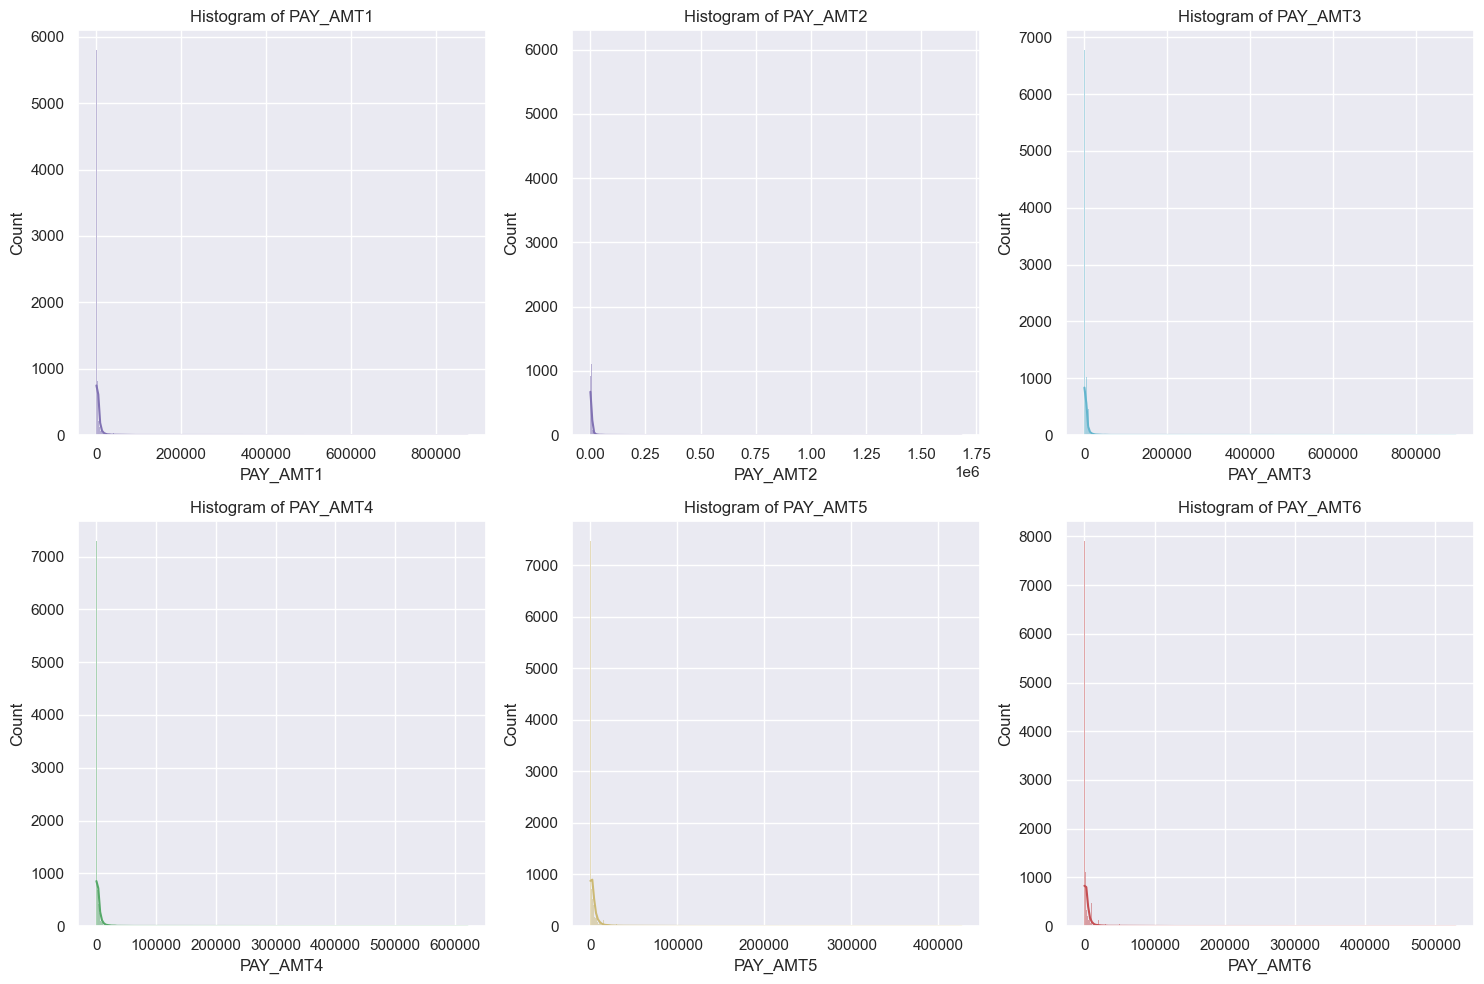

In [56]:
paid_amounts_cols = [col for col in numeric_cols if 'PAY_AMT' in col]
draw_histograms(df, paid_amounts_cols, 2, 3, figsize=(15, 10))

In [57]:
df[paid_amounts_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
90%,10300.000000,1.040110e+04,10000.00000,9570.600000,9500.000000,9600.000000
95%,18428.200000,1.900435e+04,17589.40000,16014.950000,16000.000000,17343.800000
99%,66522.180000,7.665102e+04,70000.00000,67054.440000,65607.560000,82619.050000


In [58]:
# function to draw boxplots for numeric columns
def draw_boxplots(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.boxplot(data=dataframe, x=col, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [59]:
# Filter rows where all 'previous' columns are less than their respective 99th percentile
paid_amounts_95 = {col: df[col].quantile(0.95) for col in paid_amounts_cols}
paid_amounts_95 = df[(df[paid_amounts_cols] < pd.Series(paid_amounts_95)).all(axis=1)]
paid_amounts_95.shape


(24271, 25)

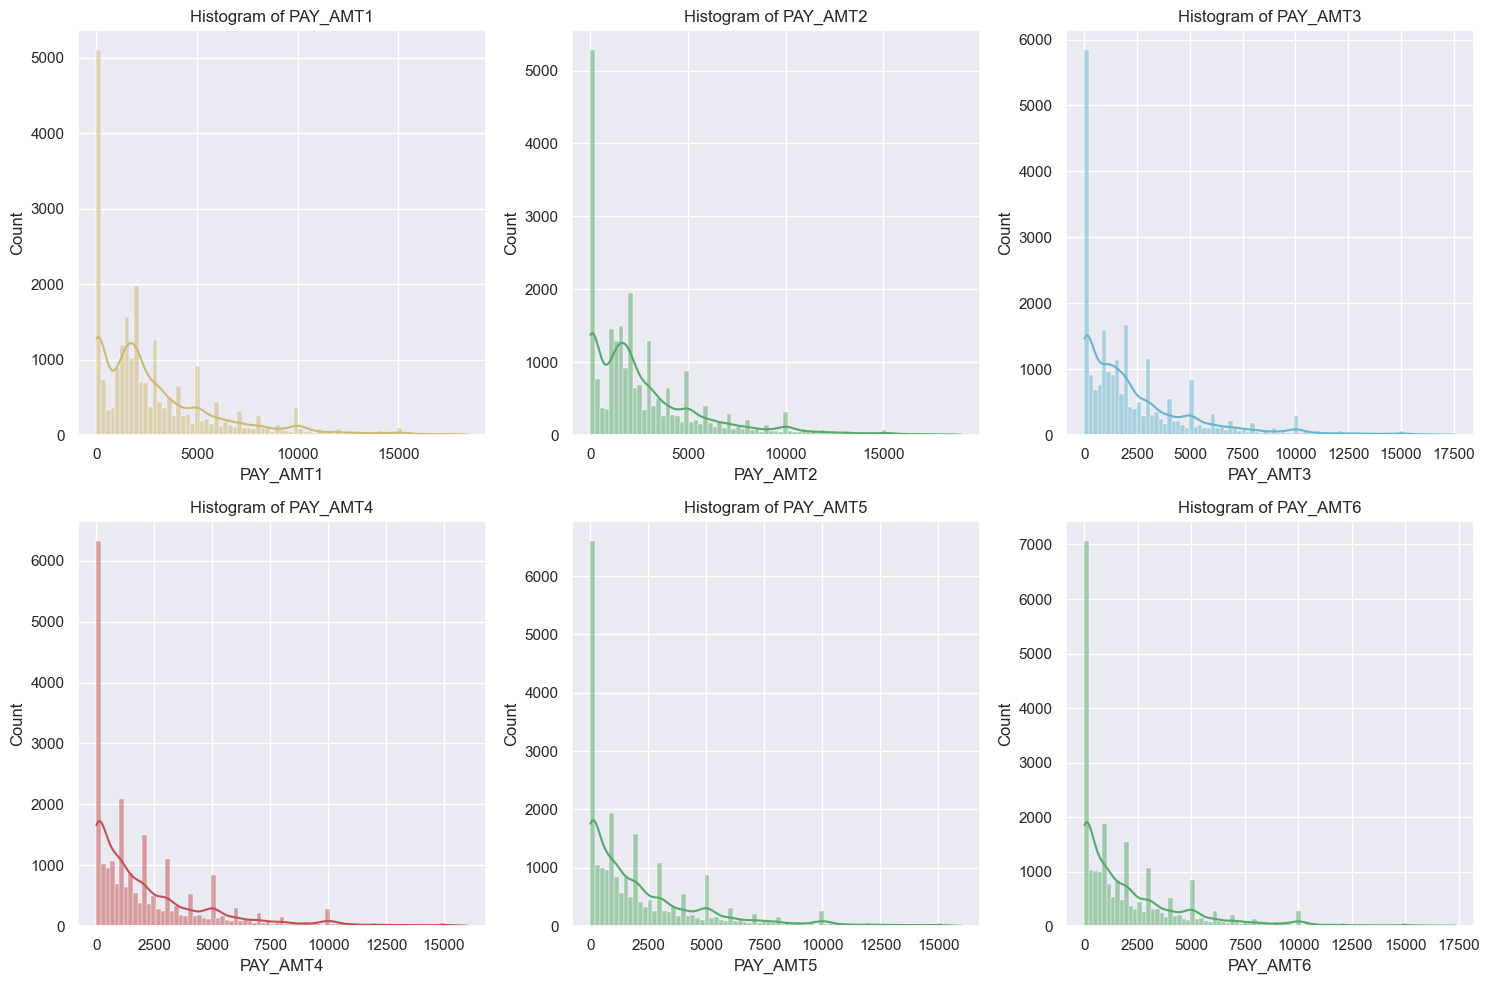

In [60]:
 
draw_histograms(paid_amounts_95, paid_amounts_cols, 2, 3, figsize=(15,10))

above histograms, highly skewed distribution is observed in all the previous payment amount columns after removing the extreme outliers.

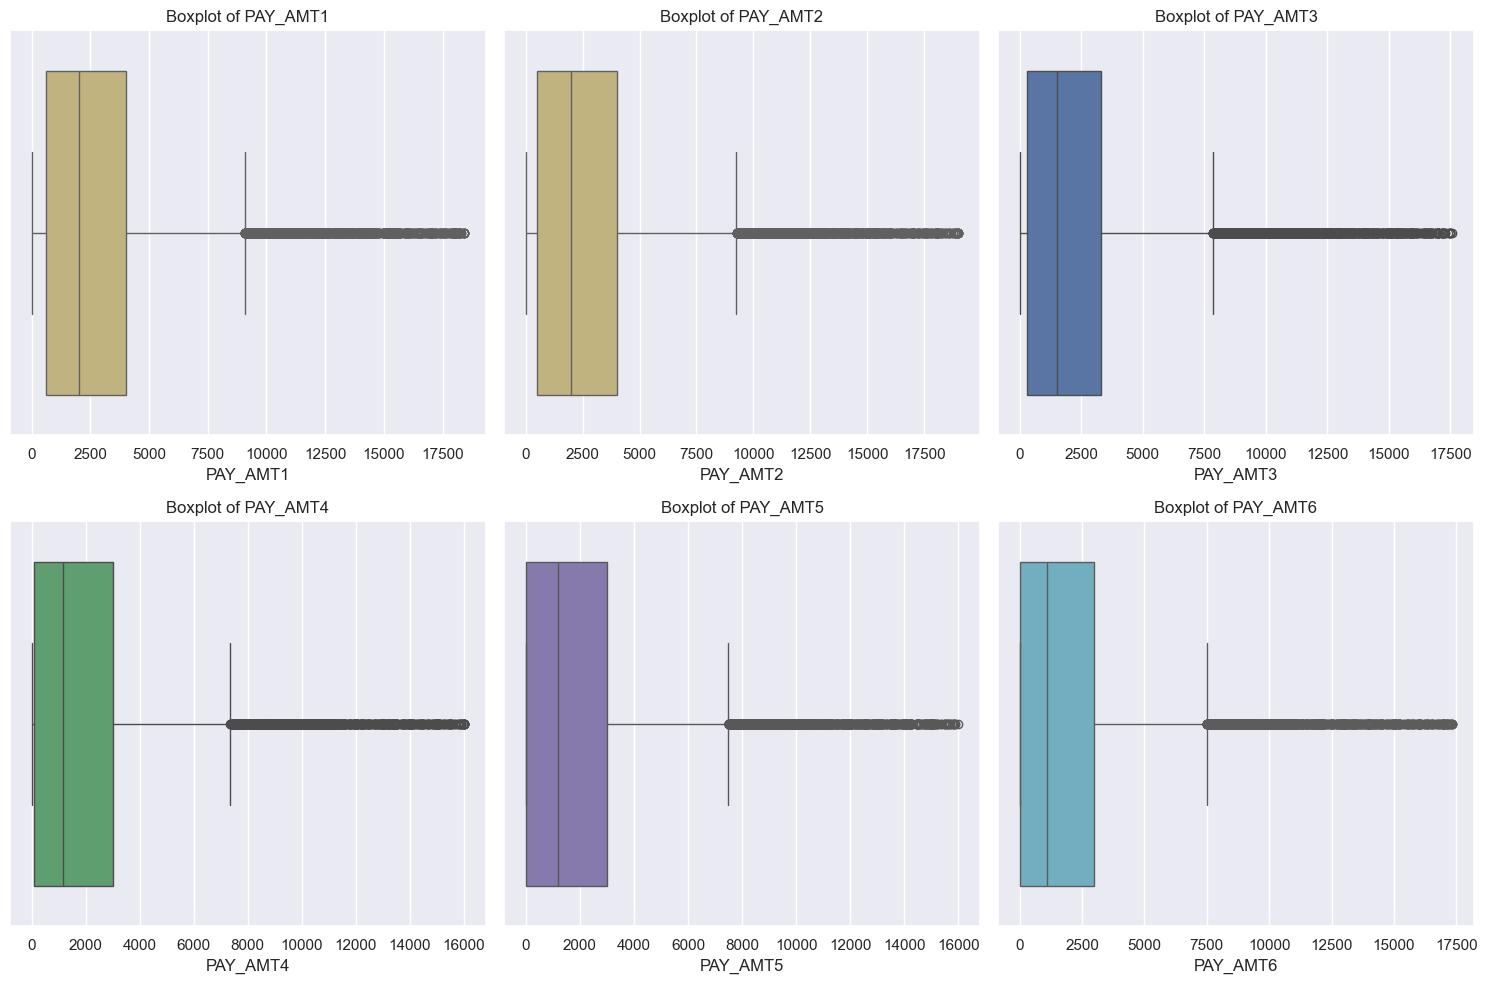

In [61]:
draw_boxplots(paid_amounts_95, paid_amounts_cols, 2, 3, figsize=(15, 10))

In [62]:
# from above boxplots we can see that there are still some outliers in the data but they are not that significant. So we can keep them as it is.    

**What paid amount says and What we can do with this**

Most customers make relatively small payments, paying only a small fraction of their bills. We need to see payment to bill ratio as well

In [63]:
df[df[payment_amount_cols].sum(axis=1) == 0].head()  # customers who never paid anything in last 6 months

NameError: name 'payment_amount_cols' is not defined

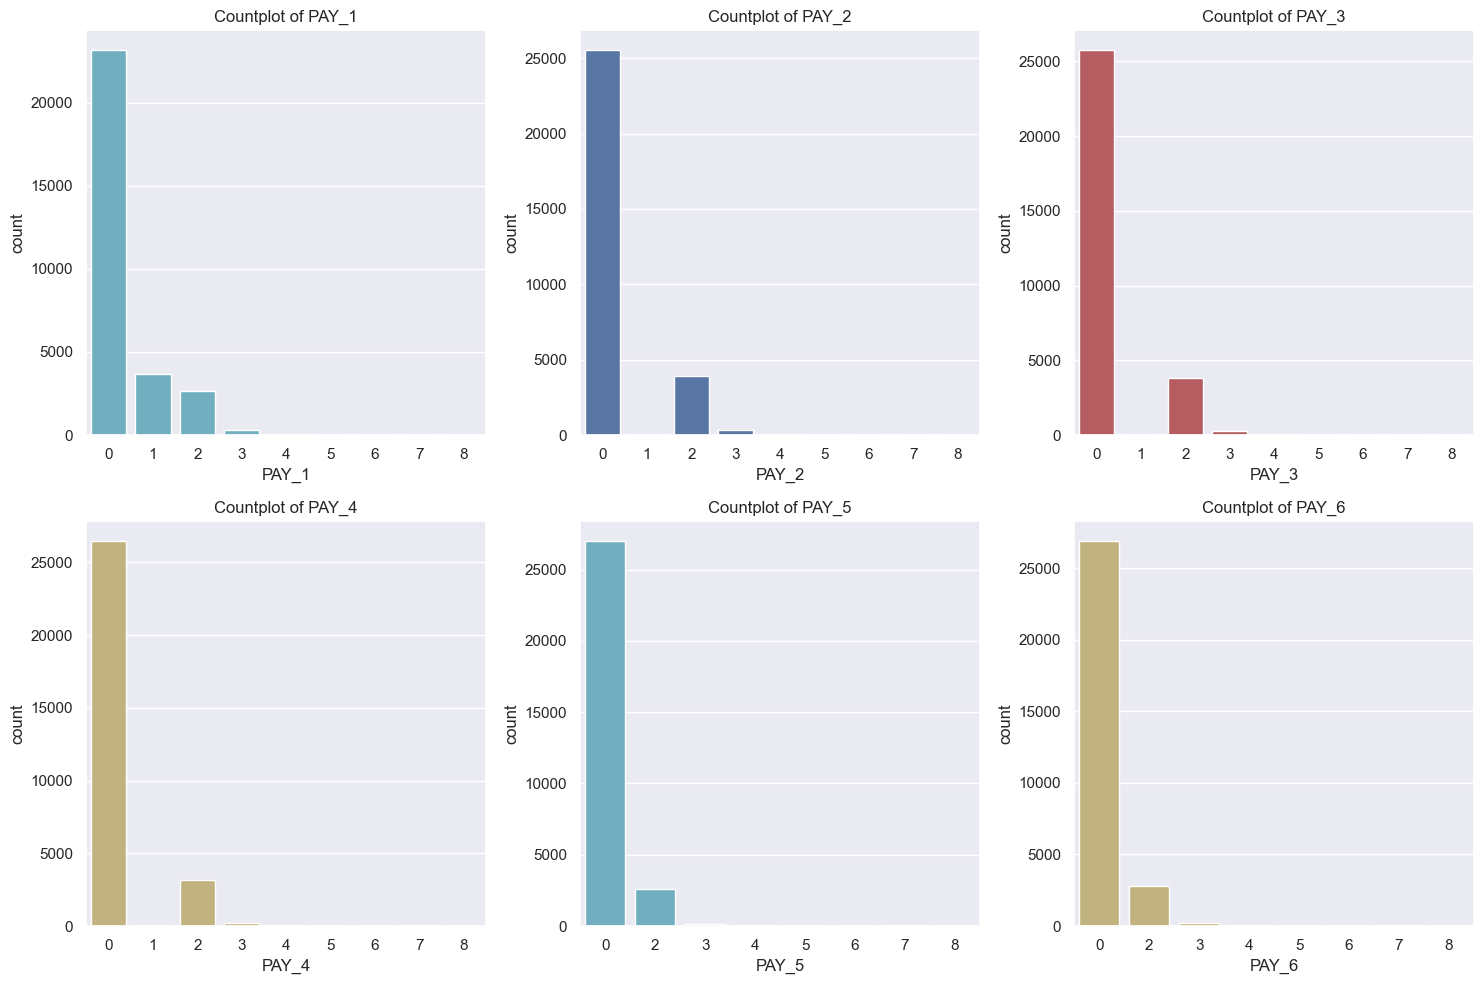

In [ ]:
# Fnction to draw barplots for categorical columns
def draw_barplots(dataframe, cols, n_rows, n_cols, figsize=(15, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        if i < len(axes):
            sns.countplot(data=dataframe, x=col, ax=axes[i], color=random.choice(colors))
            axes[i].set_title(f'Countplot of {col}')
    
    plt.tight_layout()
    plt.show()

draw_barplots(df, [f'PAY_{i+1}' for i in range(6)], 2, 3, figsize=(15, 10))

In [ ]:
df.iloc[:, 1:11]

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,Female,University,Married,24,2,2,0,0,0,0
1,Female,University,Single,26,0,2,0,0,0,2
2,Female,University,Single,34,0,0,0,0,0,0
3,Female,University,Married,37,0,0,0,0,0,0
4,Male,University,Married,57,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,Male,High School,Married,39,0,0,0,0,0,0
29996,Male,High School,Single,43,0,0,0,0,0,0
29997,Male,University,Single,37,4,3,2,0,0,0
29998,Male,High School,Married,41,1,0,0,0,0,0


In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
mode_of_credit_limit = df['LIMIT_BAL'].mode()
print(f"Mode of CREDIT LIMIT: {mode_of_credit_limit[0]}")

Mode of CREDIT LIMIT: 50000.0


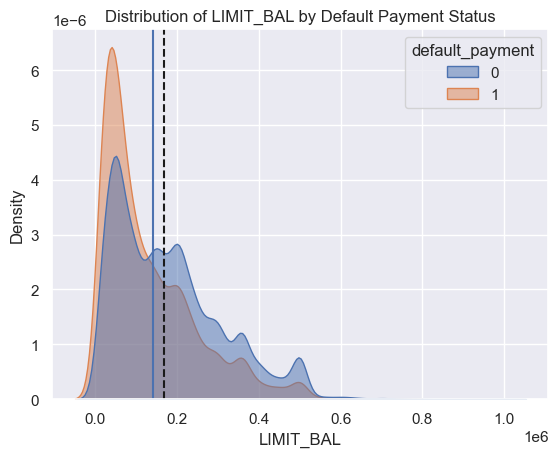

In [ ]:
sns.kdeplot(data=df, x='LIMIT_BAL', hue='default_payment', fill=True, common_norm=False, alpha=0.5)
plt.axvline(x=df['LIMIT_BAL'].mean(), color='k', linestyle='--', label='Mean LIMIT_BAL')
plt.axvline(x=df['LIMIT_BAL'].median(), color='b', linestyle='-', label='Median LIMIT_BAL')
plt.title('Distribution of LIMIT_BAL by Default Payment Status')
plt.show()


In [ ]:
# As per above distribution, we can see that most customers have a credit limit of less than 100,000. 
# The mean credit limit is around 167,484, which is higher than the median of 140,000, 
# indicating a right-skewed distribution. This suggests that while most customers have lower credit limits, 
# there are some with significantly higher limits that raise the average. but here one notably, 
# most defaulted customers are having a credit limit less than or equal to 140000.

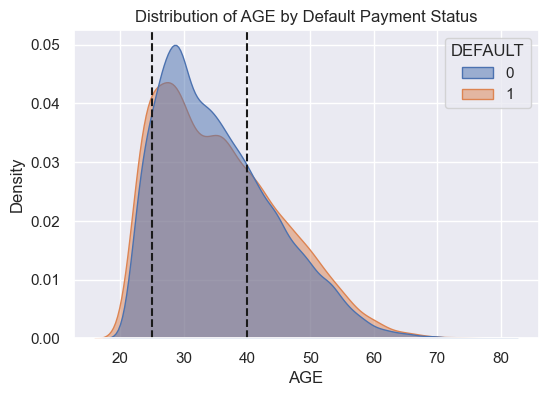

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,4))   
sns.kdeplot(data=df, x='AGE', hue=target, fill=True, common_norm=False, alpha=0.5)
plt.axvline(x=25, color='k', linestyle='--', label='Mean AGE')
plt.axvline(x=40, color='k', linestyle='--', label='Median AGE')
plt.title('Distribution of AGE by Default Payment Status')
plt.show()

In [ ]:
# as per above age distribution, most customers are between 20-50 years old. 
# and defaulted customers are mostly less than 25 or more than 40 years old.
# so age is not a significant factor for default payment prediction

In [ ]:
# Check if there are subtle differences
default_rates_by_age = df.groupby('age_group', observed=False)[target].mean()
print(default_rates_by_age)

age_group
21-30    0.224371
31-40    0.204331
41-50    0.232973
51-60    0.252379
61-70    0.264591
71-80    0.333333
Name: DEFAULT, dtype: float64


In [ ]:
# above output shows that default rates are relatively consistent across different age groups

In [ ]:
df_cross_tab = pd.crosstab(df['EDUCATION'], df[target], rownames=['EDUCATION'], colnames=['Defaulted'])
df_cross_tab["default_rate (%)"] = (df_cross_tab[1] / (df_cross_tab[0] + df_cross_tab[1]) * 100).round(2)
df_cross_tab

Defaulted,0,1,default_rate (%)
EDUCATION,,,
Graduate School,8549,2036,19.23
High School,3680,1237,25.16
Others,435,33,7.05
University,10700,3330,23.73


<Axes: xlabel='BILL_AMT1', ylabel='Density'>

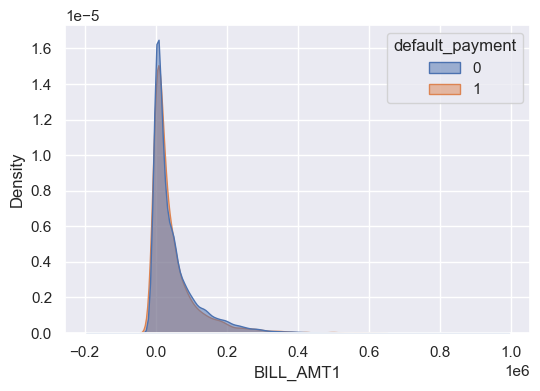

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,4))   
sns.kdeplot(data=df, x='BILL_AMT1', hue='default_payment', fill=True, common_norm=False, alpha=0.5)

In [ ]:
repayment_status_cols = [f'PAY_{i+1}' for i in range(6)]
bill_amount_cols = [f'BILL_AMT{i+1}' for i in range(6)]
payment_amount_cols = [f'PAY_AMT{i+1}' for i in range(6)]

In [ ]:
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
(df['PAY_AMT1'] >= df['BILL_AMT1']).replace({True: 1, False: 0}).value_counts()

0    23531
1     6469
Name: count, dtype: int64

In [ ]:
df['paid_enough_sep'] = df['PAY_AMT1'] >= df['BILL_AMT1']

In [ ]:
df[['paid_enough_sep', 'PAY_AMT1', 'BILL_AMT1', 'PAY_1']].head()

,paid_enough_sep,PAY_AMT1,BILL_AMT1,PAY_1
0,False,0.0,3913.0,2
1,False,0.0,2682.0,0
2,False,1518.0,29239.0,0
3,False,2000.0,46990.0,0
4,False,2000.0,8617.0,0


#### Bivariate Analysis

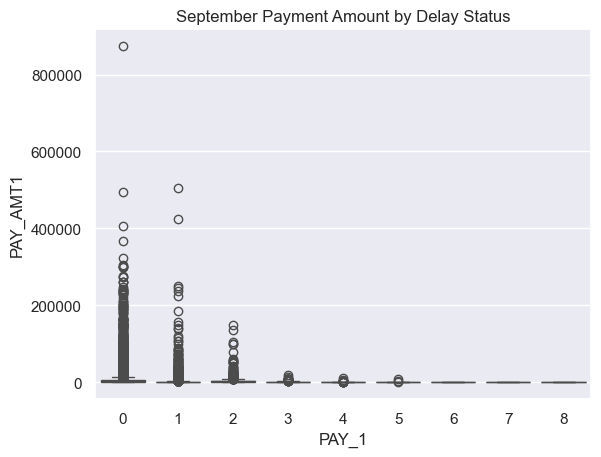

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='PAY_1', y='PAY_AMT1', data=df)
plt.title('September Payment Amount by Delay Status')
plt.show()

In [ ]:
df['delay_score'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)

In [ ]:
df['delay_score']

0        4
1        4
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    9
29998    1
29999    0
Name: delay_score, Length: 30000, dtype: int64

In [ ]:
df['min_pay_ratio_sep'] = df['PAY_AMT1'] / df['BILL_AMT1']

In [ ]:
df['min_pay_ratio_sep'] 

0         0.000000
1         0.000000
2         0.051917
3         0.042562
4         0.232099
           ...    
29995     0.044986
29996     1.091503
29997     0.000000
29998   -52.218845
29999     0.043356
Name: min_pay_ratio_sep, Length: 30000, dtype: float64

### PAY_X is a timing indicator, not a completeness indicator


In [ ]:
df[df['min_pay_ratio_sep'] > 1][['PAY_AMT1', 'BILL_AMT1', 'min_pay_ratio_sep']]

,PAY_AMT1,BILL_AMT1,min_pay_ratio_sep
11,21818.0,12261.0,1.779463
23,19428.0,5512.0,3.524673
24,5757.0,4744.0,1.213533
28,3415.0,650.0,5.253846
30,17270.0,16646.0,1.037486
...,...,...,...
29970,52951.0,33654.0,1.573394
29983,2890.0,1822.0,1.586169
29984,923.0,315.0,2.930159
29989,9054.0,3425.0,2.643504


In [ ]:
df['total_delay'] = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].clip(lower=0).sum(axis=1)

In [ ]:
df['total_delay'] 

0        4
1        4
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    9
29998    1
29999    0
Name: total_delay, Length: 30000, dtype: int64

In [ ]:
df['payment_std'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].std(axis=1)

In [ ]:
df['payment_std']

0          281.283072
1          752.772653
2         1569.815488
3          478.058155
4        13786.230736
             ...     
29995     6794.318234
29996     3515.523859
29997     8390.093365
29998    36314.167188
29999      468.865297
Name: payment_std, Length: 30000, dtype: float64

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment', 'age_group', 'paid_enough_sep', 'delay_score',
       'min_pay_ratio_sep', 'total_delay', 'payment_std'],
      dtype='object')

<Axes: >

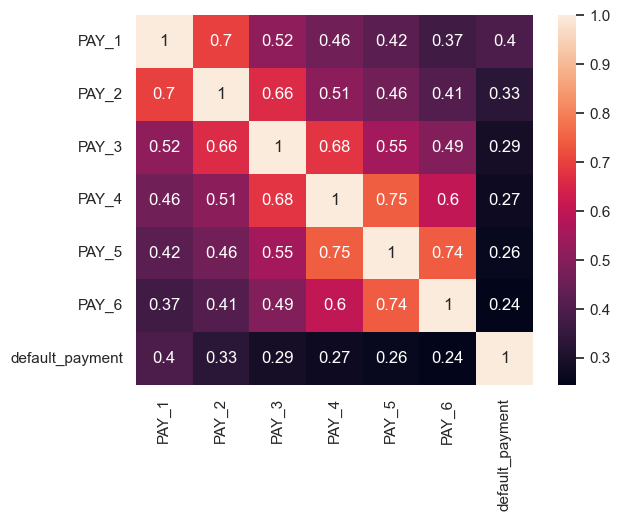

In [ ]:
import seaborn as sns
sns.heatmap(df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default_payment']].corr(), annot=True)

<Axes: xlabel='BILL_AMT1', ylabel='PAY_AMT1'>

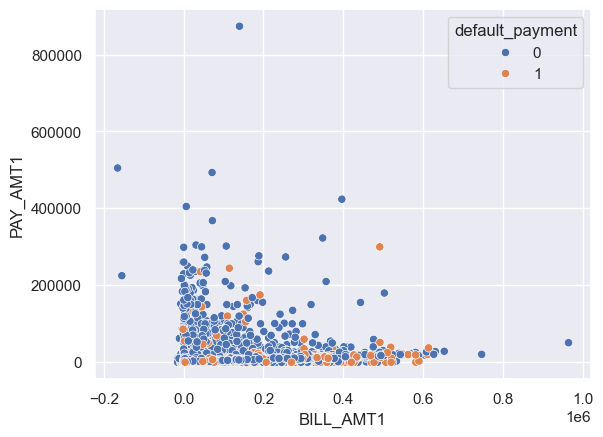

In [ ]:
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', hue='default_payment', data=df)

<Axes: >

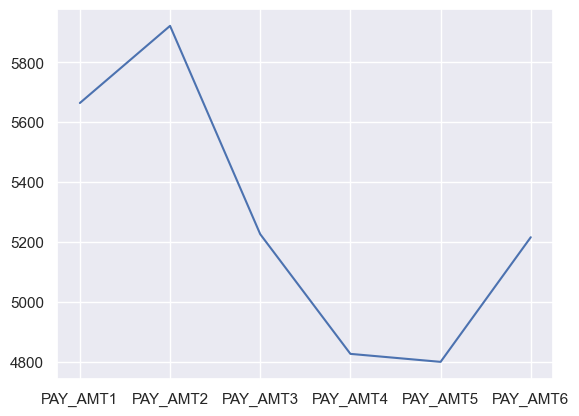

In [ ]:
df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean().plot(kind='line')

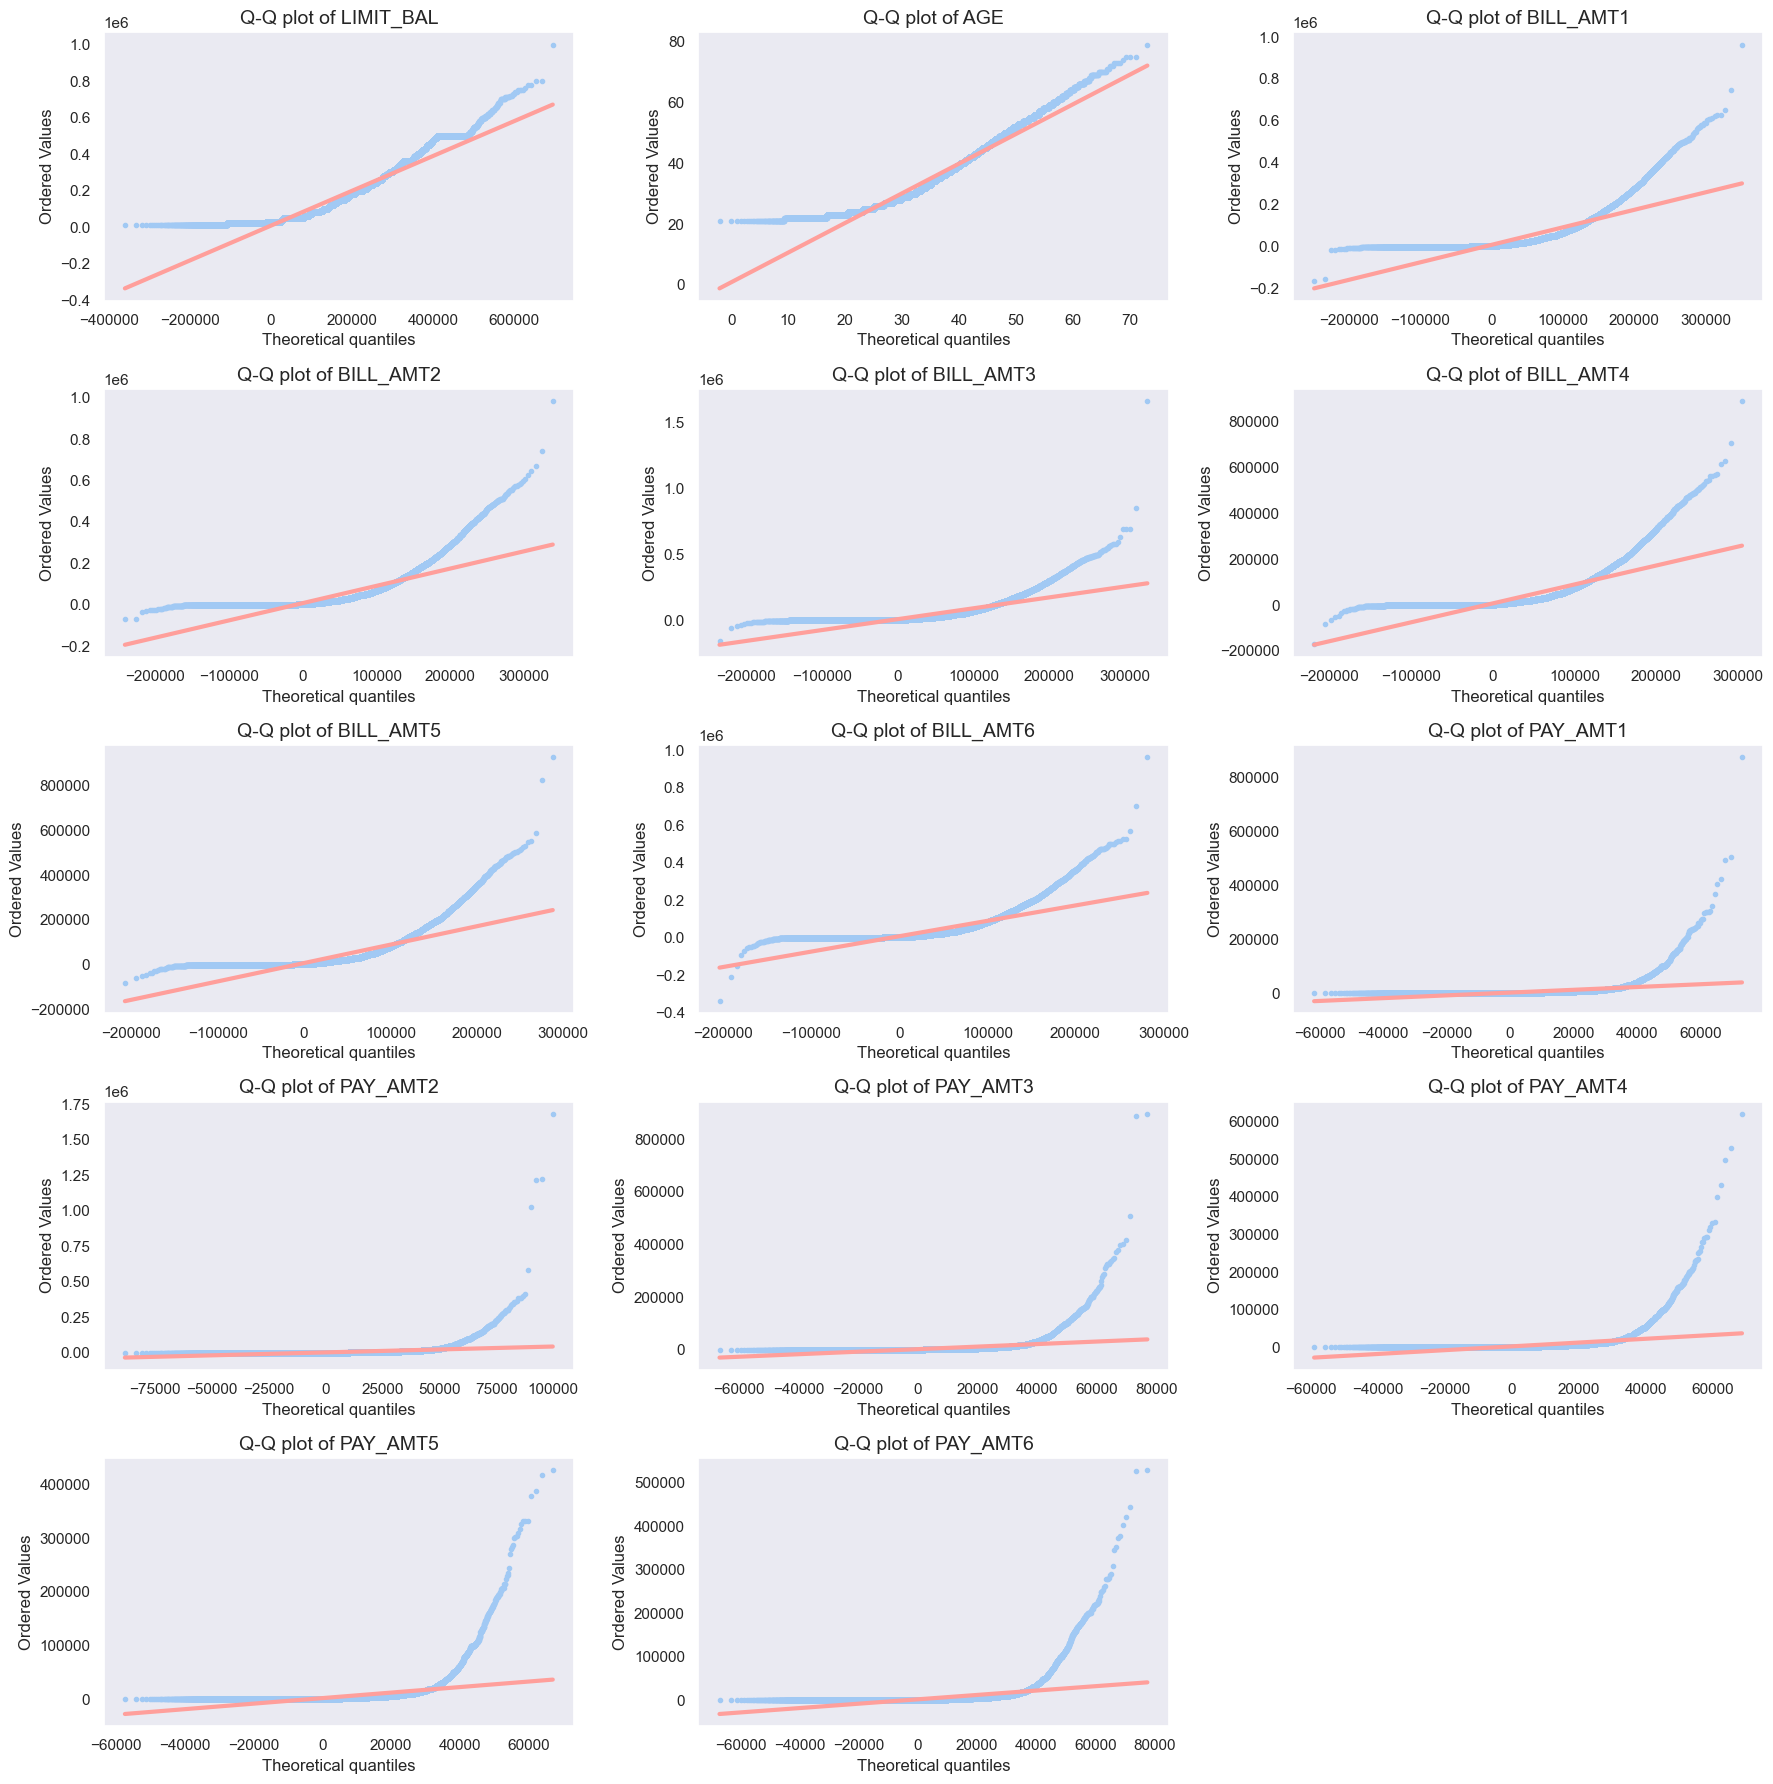

In [ ]:
import scipy.stats as stats
# Check gaussian distribution
sns.set_color_codes('pastel')
fig, axs = plt.subplots(5, 3, figsize=(18,18))

numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
i, j = 0, 0
for f in numeric:
    if j == 3:
        j = 0
        i = i+1
    stats.probplot(df[f], 
                   dist='norm', 
                   sparams=(df[f].mean(), df[f].std()), 
                   plot=axs[i,j])
    axs[i,j].set_title(f'Q-Q plot of {f}', fontsize=14)
    axs[i,j].get_lines()[0].set_marker('.')
    
    axs[i,j].grid()
    axs[i,j].get_lines()[1].set_linewidth(3.0)
    j = j+1

fig.tight_layout()
axs[4,2].set_visible(False)
# plt.savefig('images/QQplot.png')
plt.show()


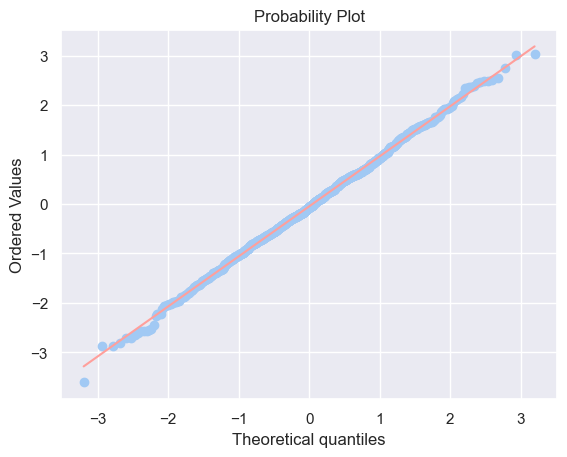

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
data = np.random.normal(0, 1, 1000)
stats.probplot(data, dist="norm", plot=plt)
plt.show()


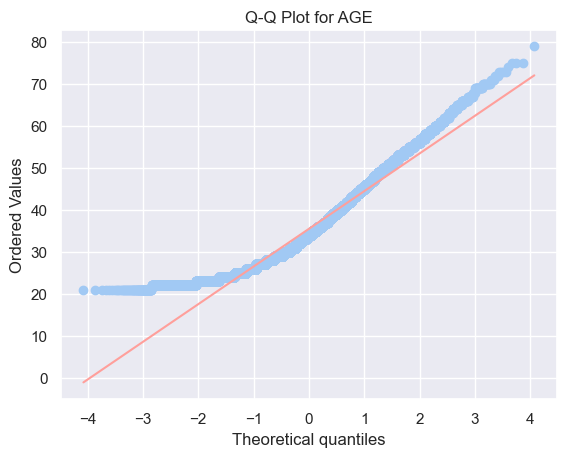

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example for AGE
stats.probplot(df['AGE'], dist="norm", plot=plt)
plt.title('Q-Q Plot for AGE')
plt.show()

## **3. Data Preprocessing,  Feature Engineering & Feature Selection**

Converts cleaned data into a format suitable for modeling.

Includes scaling, encoding categorical variables, transforming text, handling outliers.

Sometimes people include basic feature transformations here (like creating log(x) or binned features), but typically preprocessing focuses on making features “ready”, not adding new predictive information.

Creates new features or meaningful transformations to improve model performance.

Can happen after or alongside preprocessing, depending on the workflow.

Examples:

Combining height and weight → BMI

Extracting day_of_week from a date

Aggregating past behavior into a single metric

feature extraction, feature selection, feature scaling needs to be handled here

## **4. Model Selection & Training**

#### Algorithm Selection

Common Techniques for Default Prediction:- 

- Logistic regression
- Decision trees
- Random forests
- Support vector machines
- Artificial neural networks
- Gradient boosting methods
- Naive Bayes
- K-nearest neighbors

## **5. Model Evaluation & Validation**

#### Model Selection
 - cross validation
 - hyper parameter tuning

#### Model Evaluation
    metrics
        - accuracy
        - recall
        - precision
        - f1 score
        - confusion matrix
        - ROC Curve


## **6 Conclusion**

## **7 References**